

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I will investigate the TMDB movies database. This dataset contains information about 10,000 movies collected from The Movie Database. Information regarding each movie (cols) include : title, budget, revenue, cast, production company, runtime and other usefull data. 


### Question(s) for Analysis
After quickly investigating the dataset. I believe that we can analyse the data to answer the following questions:

Q1: What are the top 10 movies according to the profit?

Q2: What are the least 10 movies according to Revenue?

Q3: What are the most 10 popular movies of all time?

Q4: Does spending more budget on a movie increase the profit?

Q5: What is the max,min and average runtime of all movies?

Q6: What are the Genres associated with higher profits ?

Q7: Who are the top 10 mentioned directors of the most popular movies in the list?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
 

After Checking the data header. I realized that there are some columns that will not be necessary for my investigation.
I decided to remove the unnecessary columns to make the analysis simpler


In [5]:
#Dropping the unnecessary columns. Columns that will not be necessary to answer the auestions
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','budget_adj','revenue_adj'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [6]:
#checking min,max & mean values for numerical data
df.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


 I found zero  values in the budget, revenue and runtime columns. These values must be mistakenly gathered and they can spoil the analysis process. I will replace them with Nan to remove all entries with Nan values later

In [140]:
#replace 0 values with nan values in revenue , budget and runtime
cols=['revenue','budget','runtime']
df[cols]=df[cols].replace(0,np.nan)
df.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658
std,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [141]:
#now we have no 0 values in budget , revenue and runtime
#checking for all the Nan values in the dataset
df.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [142]:
# found movies with Nan values in budget,revenue,cast,director,runtime,genres & production_companies. These inputs will not be usefull so i will drop them
df=df.dropna()
#recheck
df.isnull().sum()


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In the preceding cells. I have removed Nan values from all columns because columns with Nan values will spoil the analysis process.

In [143]:
# Recheck info and header to make sure no Nan values are in the dataset
df.shape,df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 13 columns):
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null float64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 416.3+ KB


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [144]:
#check for duplicates
df.duplicated().sum()


1

Found 1 duplicate value 

In [145]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now all duplicated rows are removed

In [146]:
# change release date format into datetime format 
#check results
df['release_date']=pd.to_datetime(df['release_date'])
df.info()
df.sample(12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 416.2+ KB


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
8387,0.659900,5500000.0,58972904.0,Chariots of Fire,Ben Cross|Ian Charleson|Cheryl Campbell|Alice ...,Hugh Hudson,123.0,Drama|History,Twentieth Century Fox Film Corporation|Warner ...,1981-05-15,93,6.6,1981
2461,0.744837,35000000.0,40263020.0,Blast from the Past,Brendan Fraser|Alicia Silverstone|Christopher ...,Hugh Wilson,112.0,Comedy|Romance,New Line Cinema|Forge|Midnight Sun Pictures,1999-02-12,114,6.2,1999
5567,0.859276,18000000.0,22309223.0,The Railway Man,Jeremy Irvine|Colin Firth|Stellan SkarsgÃ¥rd|M...,Jonathan Teplitzky,116.0,Drama|History,Archer Street Productions|Lionsgate|Pictures i...,2013-12-26,181,6.6,2013
4313,0.246647,600000.0,185898.0,Texas Chainsaw Massacre: The Next Generation,RenÃ©e Zellweger|Matthew McConaughey|Robert Ja...,Kim Henkel,95.0,Comedy|Horror|Thriller,Ultra Muchos Productions,1994-01-01,36,3.9,1994
9018,0.878645,18000000.0,123306987.0,The Wedding Singer,Adam Sandler|Drew Barrymore|Christine Taylor|A...,Frank Coraci,95.0,Romance|Comedy,New Line Cinema|Robert Simonds Productions|Jun...,1998-02-13,375,6.4,1998
771,0.966048,20000000.0,100525432.0,Tammy,Melissa McCarthy|Susan Sarandon|Kathy Bates|Al...,Ben Falcone,97.0,Comedy,New Line Cinema|Gary Sanchez Productions,2014-07-02,381,5.1,2014
9085,0.388680,60000000.0,37141130.0,Psycho,Vince Vaughn|Anne Heche|Julianne Moore|Viggo M...,Gus Van Sant,105.0,Horror|Mystery|Thriller,Imagine Entertainment|Universal Pictures,1998-12-04,112,4.9,1998
6656,0.723825,19000000.0,68673228.0,Letters from Iwo Jima,Ken Watanabe|Kazunari Ninomiya|Tsuyoshi Ihara|...,Clint Eastwood,141.0,Action|Adventure|Drama|War,DreamWorks SKG|Amblin Entertainment|Malpaso Pr...,2006-12-19,292,6.9,2006
6312,0.608364,18000000.0,46201432.0,The Fog,Tom Welling|Maggie Grace|Selma Blair|DeRay Dav...,Rupert Wainwright,100.0,Horror|Thriller,Revolution Studios|Debra Hill Productions,2005-10-14,85,4.2,2005
10348,0.269327,11000000.0,32861136.0,The Joy Luck Club,Ming-Na Wen|Lauren Tom|Tamlyn Tomita|Rosalind ...,Wayne Wang,139.0,Drama,Hollywood Pictures,1993-09-08,17,6.8,1993


I changed the data column to datetime format to make dealing with the dates easier for later analysis.

In [147]:
#change revenue and budget to int values
cols=['budget','revenue']
df[cols]=df[cols].astype(int) 

In [148]:
# Check datatype for revenues and budget to make sure changes took place
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 416.2+ KB


I have changed the datatype for the revenue, budget from float to int for simpler numerical analysis

## Exploratory Data Analysis

First, I will calculate the profit gained by each movie in a separate column to help me answer my questions

In [149]:
# we need to add a new column ' profit' that will help us later in the analysis

df.insert(3,'profit',df['revenue']-df['budget'])
df.head()

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


## Q1: What are the top 10 movies according to the profit?
What are the top 10 movies regarding the profit ?

In [150]:
# Here we will create a function that returns the top 10 values in any column we ask for ( profit,revenue,budget).I will also
#create a similar function for the least 10 values.

def top10(col):
    df_10 = df[['original_title',col]]

    top_10=df_10.nlargest(10,col)

    return top_10

def least10(col):
    df_10 = df[['original_title',col]]

    least_10=df_10.nsmallest(10,col)

    return least_10



In [151]:
# Calling the function to extract top 10 movies regarding the profit
top10('profit')


,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


 From the Results above we can see the top 10 movies according to the profit. Avatar is first movie in the list with the maximum profit.

Text(0,0.5,'Profit')

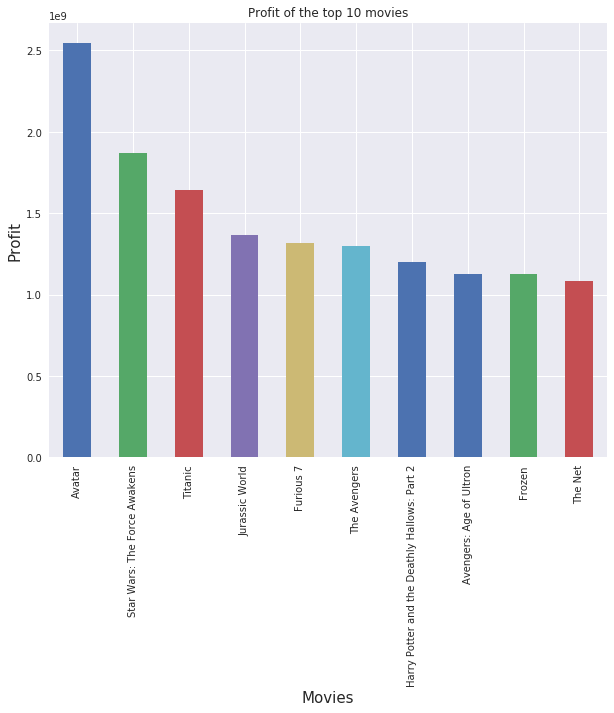

In [152]:
#Plotting the top 10 movies according to profit.
top10('profit').plot(kind='bar',x='original_title',y='profit',title='Profit of the top 10 movies',legend=False,figsize=(10,8))
plt.xlabel('Movies',fontsize=15)
plt.ylabel('Profit',fontsize=15)

### we can use the previous function to extract top or least 10 movies according to budget, profit, revenue and popularity

## Q2: What are the least 10 movies according to Revenue?

In [153]:
least10('revenue')


,original_title,revenue
5067,Shattered Glass,2
8142,Mallrats,2
5162,Kid's Story,5
8523,Bordello of Blood,5
8226,Never Talk to Strangers,6
10307,The House of the Spirits,6
5852,Hross Ã­ oss,11
8235,Tales from the Hood,11
10777,F.I.S.T.,11
7158,Chasing Liberty,12


The previous result shows the least 10 movies regarding the revenue.

## Q3: What are the most 10 popular movies of all time?

In [154]:
#Calling the top10 function and passing in the 'popularity' column as the main argument
top10('popularity')

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


Text(0,0.5,'Popularity')

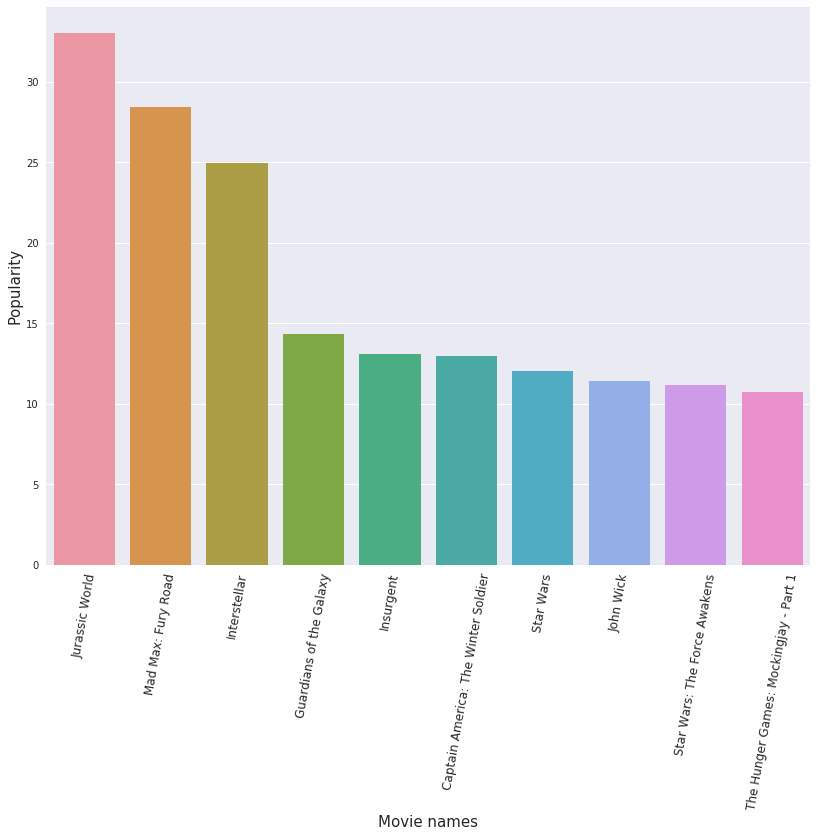

In [157]:
# Plotting the popularity of the movies using seaborn plotting methods.
sns.barplot(data=top10('popularity'),x='original_title',y='popularity')
sns.set(rc={'figure.figsize':(13.7,10.27)})
plt.xticks(rotation=80,fontsize=12)
plt.xlabel('Movie names',fontsize=15)
plt.ylabel('Popularity',fontsize=15)

## Q4: Does spending more budget on a movie increase the profit?


First, I will create a dataframe that only contains certain columns such as profit, budget , revenue and popularity

In [158]:
# Creating a separate dataframe with the needed columns only
df_pop_budg=df[['original_title','budget','popularity','revenue','profit']]
df_pop_budg.head()

,original_title,budget,popularity,revenue,profit
0,Jurassic World,150000000,32.985763,1513528810,1363528810
1,Mad Max: Fury Road,150000000,28.419936,378436354,228436354
2,Insurgent,110000000,13.112507,295238201,185238201
3,Star Wars: The Force Awakens,200000000,11.173104,2068178225,1868178225
4,Furious 7,190000000,9.335014,1506249360,1316249360


To outline the relationship between the budget and the profit, I will use a scatter plot to see the corrolation between budget and profit. If the corrolation is positive, they are directly proportional to each other.

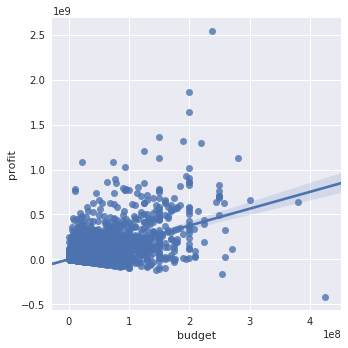

In [159]:
# now we will check the corrolation between popularity and budget to answer our question
#df_pop_budg.plot(kind='scatter',x='budget',y='profit',figsize=(8,8)) - I searched another way to draw the trendline
sns.lmplot(x="budget", y="profit", data=df_pop_budg);

 According the almost positive corrolation we see in the previous plot, we can assume that spending more budget is directly proportional to gaining more profit in the majority of movies


## Q5: What is the max,min and average runtime of all movies?

We can simply use .describe method to check the maximum, minimum and average runtime of all the movies included in the analysis process

In [160]:
df['runtime'].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [161]:
df['runtime'].mean()

109.35111695137977

Text(0,0.5,'Frequency')

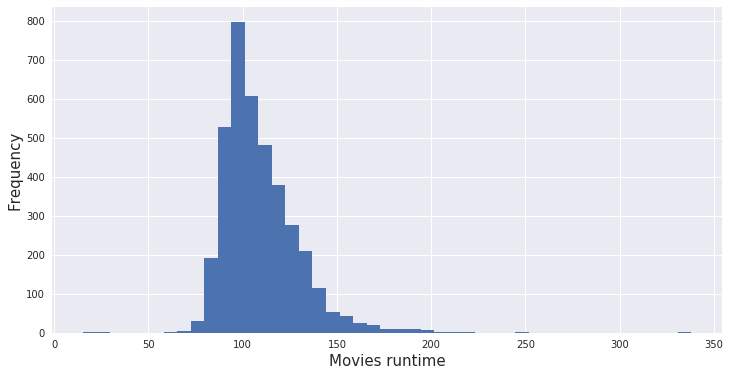

In [162]:
#plotting the runtime of all movies on a histogram
df['runtime'].plot(kind='hist',figsize=(12,6),bins=45)
plt.xlabel('Movies runtime',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

According to the previous results we can conclude that the average runtime of all movies is about 109 minutes. The maximum and minimum runtimes are 338 and 15 minutes respectively. 


## Q6: What are the Genres associated with higher profits ? 

### To answer this, we will create a DF including only the profits that are higher than the average profit. Then we will check the occurence of each genre in these high profit movies. This discussion (https://nfpdiscussions.udacity.com/t/tmdb-movie-dataset-problem-with-cast-and-genres-columns/144587/4) helped me to write this part of the code

In [163]:
# creating a df for high profit movies
top_genres_df=df.query('profit > profit.mean()')
# splitting the genres for each movie 
genres_df = top_genres_df['genres'].str.split("|", expand=True)
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head(20)

0
0 0           Action
  1        Adventure
  2  Science Fiction
  3         Thriller
1 0           Action
  1        Adventure
  2  Science Fiction
  3         Thriller
2 0        Adventure
  1  Science Fiction
  2         Thriller
3 0           Action
  1        Adventure
  2  Science Fiction
  3          Fantasy
4 0           Action
  1            Crime
  2         Thriller
5 0          Western
  1            Drama

In [164]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Comedy             384
Action             382
Drama              365
Adventure          321
Thriller           308
Family             189
Romance            179
Science Fiction    176
Fantasy            166
Crime              145
Animation          107
Horror              90
Mystery             88
Music               42
War                 39
History             26
Western             13
Documentary          3
Name: genres_adj, dtype: int64

Text(0,0.5,'Genres')

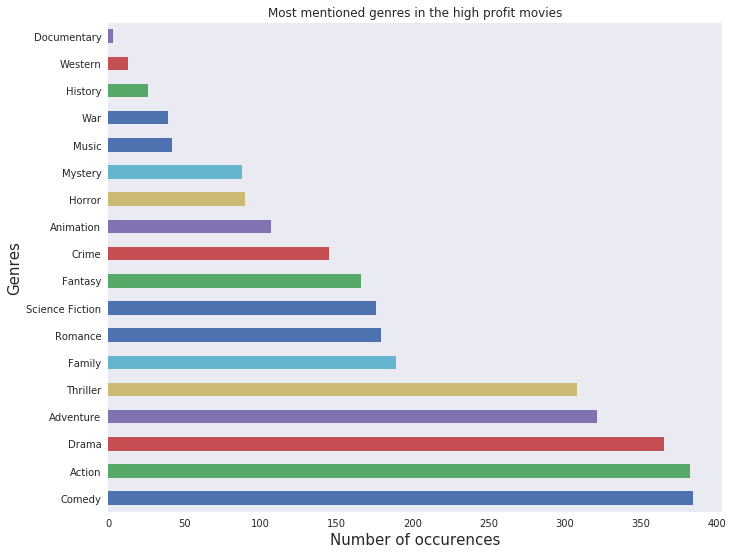

In [165]:
genres_df.genres_adj.value_counts().plot(kind='barh',figsize=(11,9),title= 'Most mentioned genres in the high profit movies',grid=False)
plt.xlabel('Number of occurences',fontsize=15)
plt.ylabel('Genres',fontsize=15)

As we can see here from the plot. The 'comedy' genre has the most occurences in the most profitable movies. In the second place with a slight difference comes the 'Action' genre. 

## Q7: Who are the top 10 mentioned directors of the most popular movies in the list? 

In [166]:
# Creating a dataframe including the popularity and director of each movie
df_popular_director=df[['original_title','popularity','director']]
df_popular_director.shape


(3805, 3)

In [167]:
# Choosing only the movies with popularity higher than the average popularity ( most popular movies )
df_popular_director = df_popular_director.query('popularity > popularity.mean()')
df_popular_director.shape

(1187, 3)

In [168]:
# Getting the largest 10 values for the recurrence of directors names 
df_popular_director['director'].value_counts().nlargest(10)

Steven Spielberg     19
Tim Burton           13
Ridley Scott         13
Martin Scorsese      11
David Fincher        10
Quentin Tarantino     9
Robert Zemeckis       8
Peter Jackson         8
Richard Donner        7
Christopher Nolan     7
Name: director, dtype: int64

Text(0,0.5,'Number of  movies by the director')

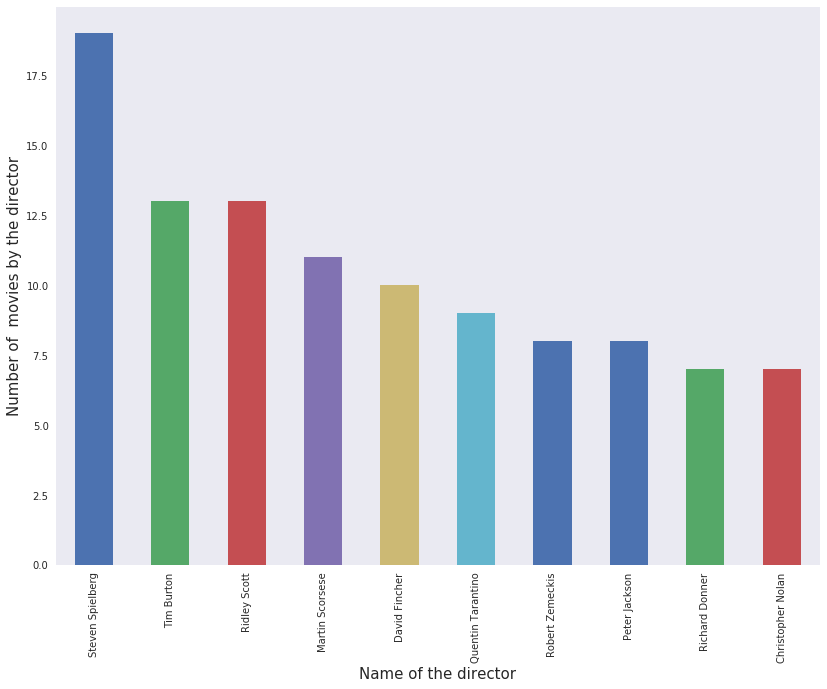

In [169]:
df_popular_director['director'].value_counts().nlargest(10).plot(kind='bar',grid=False)
plt.xlabel('Name of the director',fontsize=15)
plt.ylabel('Number of  movies by the director',fontsize=15)

As we can see from the preceding cell results. Those are the top 10 mentioned directors in the high profit movies of our list

<a id='conclusions'></a>
## Conclusions

The dataset was very interesting during the analysis process. It is very rich in information. However, I have faced some limitations such as the presence of zero and Nan values. This lead to the removal of many entries and excluding them from the analysis process. Based on the asked questions and the given results I could figure out:

1- The titles of the top 10 most profitable movies according to their revenue vs budget.

2- The titles of the top 10 most popular movies

3- The titles of least 10 movies according to the gained revenue

4- The relationship between the budget and profit of all movies. According to the scatter plot and the almost positive corrolation I found, I can conclude that in most cases, spending more budget on a movie gives a higher chance for the movie to make a higher profit. 

5- The average runtime of all movies is about 109 minutes. The maximum and minimum runtimes are 338 and 15 minutes respectively.

6- Regarding the profit, the 'comedy' genre was mentioned more than any other genre in the most profitable movies. The 'Action' genre came in the second place with a slight difference

7- Regarding the popluarity of movies, Steven Spielberg was the most mentioned director in the most popular movies. 


References Used:

https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan

https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

https://nfpdiscussions.udacity.com/t/tmdb-movie-dataset-problem-with-cast-and-genres-columns/144587/4


In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0